In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic_df = pd.read_csv('titanic_train.csv')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace= True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)

In [5]:
titanic_df.isnull().sum().sum() # True:1 / False : 0으로 대체되어서 나옴 (0 : null이 없음)

0

In [6]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [7]:
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [8]:
titanic_df['Cabin'].value_counts()

N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

In [9]:
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64

In [10]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[0] #str:문자열을 쓸수있게끔 바꿔주는애

In [11]:
titanic_df['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [12]:
titanic_df.groupby(['Sex','Survived'])[['Survived']].count()

Survived
Sex    Survived          
female 0               81
       1              233
male   0              468
       1              109

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

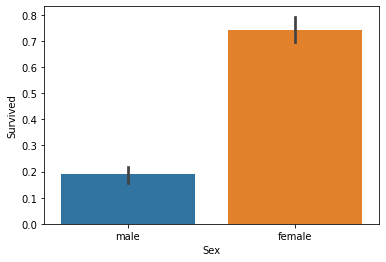

In [13]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

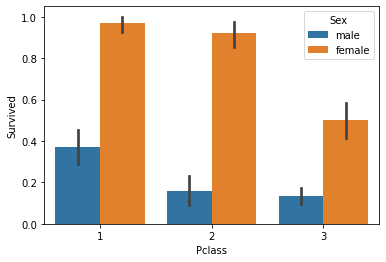

In [14]:
sns.barplot(x='Pclass', y='Survived',hue="Sex", data=titanic_df)

In [15]:
titanic_df[['Age']]

,Age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
...,...
886,27.000000
887,19.000000
888,29.699118
889,26.000000


In [16]:
def get_category(age):
    cat = ''
    if age <= -1 :
        cat = 'Unkown'
    elif age <= 5 :
        cat = 'Baby'
    elif age <= 12 :
        cat = 'Child'
    elif age <= 18 :
        cat = 'Teenager'
    elif age <= 25 :
        cat = 'Student'
    elif age <= 35 :
        cat = 'Young Adult'
    elif age <= 60 :
        cat = 'Adult'
    else :
        cat = 'Elderly'
    return cat

In [17]:
get_category(45)

'Adult'

In [18]:
group_name = ['Unkown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

In [19]:
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x:get_category(x)) # apply : 함수적용 / x는 다른걸써도 무방

<AxesSubplot:xlabel='Age_cat', ylabel='Survived'>

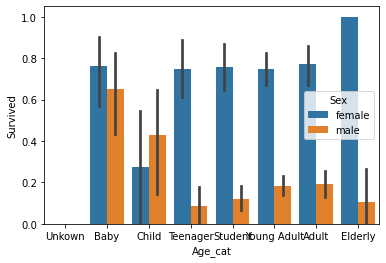

In [20]:
sns.barplot(x = 'Age_cat', y='Survived', hue='Sex', data = titanic_df, order= group_name, hue_order = ['female', 'male'])

In [22]:
# 2022년 6월 9일 작업완료

In [23]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,N,S,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,N,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,N,S,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,N,S,Young Adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B,S,Student
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,N,S,Young Adult
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,C,Young Adult


In [131]:
from sklearn.preprocessing import LabelEncoder

In [144]:
df = pd.read_csv('titanic_train.csv')
fillna(df).head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,N,S


In [145]:
#df.isnull().sum() #널값이면 트루, 아니면 펄스

In [146]:
#drop_features(df).head(1)

In [147]:
#format_features(df)

In [148]:
transfrom_features(df).head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,7,3
1,1,1,0,38.0,1,0,71.2833,2,0
2,1,3,0,26.0,0,0,7.9250,7,3


In [149]:
titanic_df = pd.read_csv('titanic_train.csv')

In [150]:
# 레이블, 종속변수,,, 
y_titanic_df = titanic_df['Survived'] 
y_titanic_df.head(3)

0    0
1    1
2    1
Name: Survived, dtype: int64

In [151]:
x_titanic_df = titanic_df.drop(columns = ['Survived'])
x_titanic_df.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [152]:
 # 독립변수, 피쳐, 변수
x_titanic_df = transfrom_features(x_titanic_df)

In [154]:
x_titanic_df.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,7,3
1,1,0,38.0,1,0,71.2833,2,0


In [155]:
# 학습용데이터, ㅇㅇ용 데이터로 분리

In [156]:
from sklearn.model_selection import train_test_split

In [158]:
x_train, x_test, y_train, y_test = train_test_split(x_titanic_df, y_titanic_df,
                                                    test_size = 0.2, random_state = 11)

# test_size : 테스트용(검증용)으로 20프로 / 트레인용(학습용)으로는 80프로 

In [180]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

In [181]:
#결정트리, 랜덤포레스트, 로지스틱 회귀를 위한 사이킷런 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=tate = 11)
rf_clf = RandomForestClassifier(random_state = 11)
lr_clf = LogisticRegression(solver = 'liblinear') 

#penalty :회귀개수값을 줄이는 용도로 씀: 과적합이 생기지 않게하기 위해 패널티를 줌. 
# fit_intercept = True 바이어스, 인터셉트 값을 찾을건지 0으로 두고 걍 할건지..? 트루면 찾겠단소리임
# solver : 알고리즘의 종류....{'newton-cg, lbfgs, liblinear, sag, saga'} 등이 잇다..하나씩 다 넣어서 성능이 좋은거 같은걸 쓰면 댄다캄

In [185]:
# 디시즌트리 학습/예측 평가
dt_clf.fit(x_train, y_train) # 학습하여라.. 답은 y_train이다
dt_pred = dt_clf.predict(x_test) # 예측하여라.. 답은 없다
print('디시즌트리 정확도: {0:4f}'.format(accuracy_score(y_test, dt_pred))) # {0:4f}소수이하 네자리..  실수형태니까 f를 붙여주는거래

# print(f'디시즌트리정확도: {accuracy_score(y_test, dt_pred):.4f}')

디시즌트리 정확도: 0.787709


In [183]:
rf_clf.fit(x_train, y_train) # 학습하여라.. 답은 y_train이다
rf_pred = rf_clf.predict(x_test) # 예측하여라.. 답은 없다
print(f'디시즌트리정확도: {accuracy_score(y_test, rf_pred):.4f}')

디시즌트리정확도: 0.8547


In [184]:
lr_clf.fit(x_train, y_train) # 학습하여라.. 답은 y_train이다
lr_pred = lr_clf.predict(x_test) # 예측하여라.. 답은 없다
print(f'디시즌트리정확도: {accuracy_score(y_test, lr_pred):.4f}')

디시즌트리정확도: 0.8659


In [186]:
# 디시즌보단 랜덤포레스트가 더 잘나온대

In [187]:
# 교차검증을하자.. kfold

In [212]:
def exec_kfold(clf, x, y, folds = 5):
    from sklearn.metrics import accuracy_score
    from sklearn.model_selection import KFold
    import numpy as np
    
    kfold = KFold(n_splits = folds)
    scores = []
    
    for iter_count, (train_index, test_index) in enumerate(kfold.split(x)):
        x_train, x_test = x.values[train_index], x.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]

        clf.fit(x_train, y_train)
        predictions = clf.predict(x_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print(f'교차검증 {iter_count} 정확도: {accuracy}')
    

    print(f'평균 정확도: {np.mean(scores)}')


In [213]:
exec_kfold(dt_clf, x_titanic_df, y_titanic_df, folds = 5)

교차검증 0 정확도: 0.7541899441340782
교차검증 1 정확도: 0.7808988764044944
교차검증 2 정확도: 0.7865168539325843
교차검증 3 정확도: 0.7696629213483146
교차검증 4 정확도: 0.8202247191011236
평균 정확도: 0.782298662984119


In [214]:
exec_kfold(rf_clf, x_titanic_df, y_titanic_df, folds = 5)

교차검증 0 정확도: 0.7932960893854749
교차검증 1 정확도: 0.8089887640449438
교차검증 2 정확도: 0.8370786516853933
교차검증 3 정확도: 0.7752808988764045
교차검증 4 정확도: 0.8595505617977528
평균 정확도: 0.8148389931579938


In [215]:
exec_kfold(lr_clf, x_titanic_df, y_titanic_df, folds = 5)

교차검증 0 정확도: 0.7932960893854749
교차검증 1 정확도: 0.7921348314606742
교차검증 2 정확도: 0.7752808988764045
교차검증 3 정확도: 0.7471910112359551
교차검증 4 정확도: 0.8426966292134831
평균 정확도: 0.7901198920343984


In [216]:
from sklearn.model_selection import cross_val_score

In [218]:
scores = cross_val_score(dt_clf, x_titanic_df, y_titanic_df, cv=5)

In [221]:
for iter_count, accuracy in enumerate(scores):
    print(f'교차검증 {iter_count} 정확도: {accuracy:.4f}')
print(f'평균정확도 {np.mean(scores):.4f}')

# 교차검증 0 정확도: 0.7541899441340782
# 교차검증 1 정확도: 0.7808988764044944
# 교차검증 2 정확도: 0.7865168539325843
# 교차검증 3 정확도: 0.7696629213483146
# 교차검증 4 정확도: 0.8202247191011236
# 평균 정확도: 0.782298662984119

교차검증 0 정확도: 0.7430
교차검증 1 정확도: 0.7753
교차검증 2 정확도: 0.7921
교차검증 3 정확도: 0.7865
교차검증 4 정확도: 0.8427
평균정확도 0.7879


In [224]:
cross_val_score(rf_clf, x_titanic_df, y_titanic_df, cv=5)
print(scores)
print(np.mean(scores))

# 교차검증 0 정확도: 0.7932960893854749
# 교차검증 1 정확도: 0.8089887640449438
# 교차검증 2 정확도: 0.8370786516853933
# 교차검증 3 정확도: 0.7752808988764045
# 교차검증 4 정확도: 0.8595505617977528
# 평균 정확도: 0.8148389931579938

[0.74301676 0.7752809  0.79213483 0.78651685 0.84269663]
0.7879291946519366


In [225]:
cross_val_score(lr_clf, x_titanic_df, y_titanic_df, cv=5)
print(scores)
print(np.mean(scores))

# 교차검증 0 정확도: 0.7932960893854749
# 교차검증 1 정확도: 0.7921348314606742
# 교차검증 2 정확도: 0.7752808988764045
# 교차검증 3 정확도: 0.7471910112359551
# 교차검증 4 정확도: 0.8426966292134831
# 평균 정확도: 0.7901198920343984

[0.74301676 0.7752809  0.79213483 0.78651685 0.84269663]
0.7879291946519366


In [226]:
from sklearn.model_selection import GridSearchCV

In [228]:
param = {
    'max_depth' : [2, 3, 5, 10],
    'min_samples_split' : [2, 3, 5],
    'min_samples_leaf' : [1, 5, 8]
}

In [237]:
grid_dt = GridSearchCV(dt_clf, param_grid= param, scoring = 'accuracy', cv = 5)
grid_dt.fit(x_train, y_train)
print(f'최적의 파라메타 : {grid_dt.best_params_}')
print(f'최고 정확도: {grid_dt.best_score_}')

최적의 파라메타 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
최고 정확도: 0.7991825076332119


In [238]:
pred = grid_dt.best_estimator_.predict(x_test)

In [239]:
accuracy_score(y_test, pred)

0.8715083798882681